<a href="https://colab.research.google.com/github/NikhitapHegde/final_year_project/blob/main/brainnn_tumor_accuracies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 27.0 MB/s eta 0:00:00


In [4]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import os
import seaborn as sns
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, Reshape, Input, Conv2DTranspose
from keras.layers import Activation, LeakyReLU, BatchNormalization, Dropout, Resizing
from keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import VGG16

import warnings
warnings.filterwarnings('ignore')

try:
    from tensorflow.keras.optimizers import Adam
except:
    from keras.optimizers import Adam

In [6]:
# NOISE_DIM = 100
# BATCH_SIZE = 4
# STEPS_PER_EPOCH = 3750
# EPOCHS = 10
# SEED = 40
# WIDTH, HEIGHT, CHANNELS = 128, 128, 1

# OPTIMIZER = Adam(0.0002, 0.5)

NOISE_DIM = 100
BATCH_SIZE = 6   # Increase slightly from 4 to 8
STEPS_PER_EPOCH = 100  # Adjust based on dataset size
EPOCHS = 20  # Keep the same, increase to 20-30 if needed
SEED = 40  # No change
WIDTH, HEIGHT, CHANNELS = 128, 128, 1  # No change
OPTIMIZER = Adam(0.0002, 0.5)  # No change

In [1]:
from google.colab import files

# Upload the ZIP file
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [2]:
import zipfile
import os

# Define the name of the uploaded ZIP file
zip_file_name = 'archive (1).zip'  # Change this if your file has a different name

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

print("Files extracted to: extracted_files/")

Files extracted to: extracted_files/


In [3]:
from google.colab import files

# Upload the ZIP file
uploaded = files.upload()

Saving BRAIN_TUMOR_YES_IMAGES.zip to BRAIN_TUMOR_YES_IMAGES.zip


In [4]:
import zipfile
import os

# Define the name of the uploaded ZIP file
zip_file_name = 'BRAIN_TUMOR_YES_IMAGES.zip'

# Define target directory inside extracted_files
target_dir = 'extracted_files/BRAIN_TUMOR_YES'

# Create the new folder if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Extract the ZIP file into the new folder
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(target_dir)

print(f"Files extracted to: {target_dir}/")

Files extracted to: extracted_files/BRAIN_TUMOR_YES/


In [5]:
from google.colab import files

# Upload the ZIP file
uploaded = files.upload()

Saving BRAIN_TUMOR_NO_IMAGES.zip to BRAIN_TUMOR_NO_IMAGES.zip


In [6]:
import zipfile
import os

# Define the name of the uploaded ZIP file
zip_file_name = 'BRAIN_TUMOR_NO_IMAGES.zip'

# Define target directory inside extracted_files
target_dir = 'extracted_files/BRAIN_TUMOR_NO'

# Create the new folder if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Extract the ZIP file into the new folder
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(target_dir)

print(f"Files extracted to: {target_dir}/")

Files extracted to: extracted_files/BRAIN_TUMOR_NO/


In [7]:
import os
import shutil

# List all YES folders
yes_folders = [
    'extracted_files/BRAIN_TUMOR_YES',

    'extracted_files/yes'
]

# List all NO folders
no_folders = [
    'extracted_files/BRAIN_TUMOR_NO',

    'extracted_files/no'
]

# Target folders
combined_yes = 'combined/yes'
combined_no = 'combined/no'
os.makedirs(combined_yes, exist_ok=True)
os.makedirs(combined_no, exist_ok=True)

# Copy YES images
for folder in yes_folders:
    if os.path.exists(folder):
        for file in os.listdir(folder):
            src = os.path.join(folder, file)
            dst = os.path.join(combined_yes, file)
            if os.path.isfile(src):
                shutil.copy2(src, dst)

# Copy NO images
for folder in no_folders:
    if os.path.exists(folder):
        for file in os.listdir(folder):
            src = os.path.join(folder, file)
            dst = os.path.join(combined_no, file)
            if os.path.isfile(src):
                shutil.copy2(src, dst)

print("✅ All YES and NO images are now in 'combined/yes' and 'combined/no'")

✅ All YES and NO images are now in 'combined/yes' and 'combined/no'


In [8]:
# Install necessary libraries
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.5 MB/s eta 0:00:00


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your dataset folders
train_dir = '/content/combined/'

# Data augmentation and rescaling for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data will be used for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Use this subset for training
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Use this subset for validation
)

# Check the output to ensure that both training and validation data are loaded correctly
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")


Found 2603 images belonging to 2 classes.
Found 650 images belonging to 2 classes.
Training samples: 2603
Validation samples: 650


CNN MODEL

In [11]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no)
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

cnn_model = create_cnn_model()
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

ANN MODEL

In [12]:
def create_ann_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(150, 150, 3)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no)
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

ann_model = create_ann_model()
ann_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     8,640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,650,497 (33.00 MB)

 Trainable params: 8,650,497 (33.00 MB)

 Non-trainable params: 0 (0.00 B)

MLP MODEL

In [13]:
def create_mlp_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(150, 150, 3)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no)
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

mlp_model = create_mlp_model()
mlp_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     4,320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,322,177 (16.49 MB)

 Trainable params: 4,322,177 (16.49 MB)

 Non-trainable params: 0 (0.00 B)

TRAINING CNN

In [18]:
cnn_history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9935 - loss: 0.0162 - val_accuracy: 0.8875 - val_loss: 0.3989
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.8813 - val_loss: 0.7396
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9937 - loss: 0.0138 - val_accuracy: 0.8766 - val_loss: 0.3554
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 1.0000 - loss: 2.1396e-04 - val_accuracy: 0.8453 - val_loss: 0.4486
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9946 - loss: 0.0135 - val_accuracy: 0.8359 - val_loss: 0.4636
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9688 - loss: 0.0462 - val_accuracy: 0.8469 - val_loss: 0.5998
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9944 - loss: 0.0137 - val_accuracy: 0.8984 - val_loss: 0.2912
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9062 - loss: 0.1346 - val_accuracy:

TRAINING ANN

In [15]:
ann_history = ann_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 38s 451ms/step - accuracy: 0.5360 - loss: 1.5479 - val_accuracy: 0.5219 - val_loss: 1.2216
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4375 - loss: 1.3569 - val_accuracy: 0.5750 - val_loss: 0.8051
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 35s 430ms/step - accuracy: 0.6071 - loss: 0.7627 - val_accuracy: 0.5734 - val_loss: 0.7679
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6562 - loss: 0.6413 - val_accuracy: 0.5547 - val_loss: 0.8901
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 35s 431ms/step - accuracy: 0.6481 - loss: 0.6650 - val_accuracy: 0.5625 - val_loss: 0.8107
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5312 - loss: 0.7027 - val_accuracy: 0.5281 - val_loss: 0.8146
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 36s 439ms/step - accuracy: 0.5928 - loss: 0.7706 - val_accuracy: 0.5844 - val_loss: 0.6993
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6250 - loss: 0.6161 - val_accuracy: 0.

TRAINING MLP

In [16]:
mlp_history = mlp_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - accuracy: 0.5594 - loss: 1.4196 - val_accuracy: 0.5031 - val_loss: 1.3585
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7500 - loss: 0.7303 - val_accuracy: 0.5016 - val_loss: 1.8208
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 0.5840 - loss: 0.8725 - val_accuracy: 0.5766 - val_loss: 0.7703
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6875 - loss: 0.6391 - val_accuracy: 0.6062 - val_loss: 0.7210
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 0.6152 - loss: 0.6751 - val_accuracy: 0.6203 - val_loss: 0.6918
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5312 - loss: 0.6171 - val_accuracy: 0.5578 - val_loss: 0.7771
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - accuracy: 0.6309 - loss: 0.6712 - val_accuracy: 0.6391 - val_loss: 0.7214
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6875 - loss: 0.6286 - val_accuracy: 0.

EVALUATE CNN

In [19]:
cnn_results = cnn_model.evaluate(validation_generator)
print(f"CNN - Test Loss: {cnn_results[0]} - Test Accuracy: {cnn_results[1]}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 385ms/step - accuracy: 0.8380 - loss: 0.4805
CNN - Test Loss: 0.507642388343811 - Test Accuracy: 0.8492307662963867


EVALUATE ANN

In [20]:
ann_results = ann_model.evaluate(validation_generator)
print(f"ANN - Test Loss: {ann_results[0]} - Test Accuracy: {ann_results[1]}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.5905 - loss: 0.7665
ANN - Test Loss: 0.7952045798301697 - Test Accuracy: 0.5646153688430786


EVALUATE MLP

In [21]:
mlp_results = mlp_model.evaluate(validation_generator)
print(f"MLP - Test Loss: {mlp_results[0]} - Test Accuracy: {mlp_results[1]}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.6377 - loss: 0.7290
MLP - Test Loss: 0.7284814715385437 - Test Accuracy: 0.6323077082633972


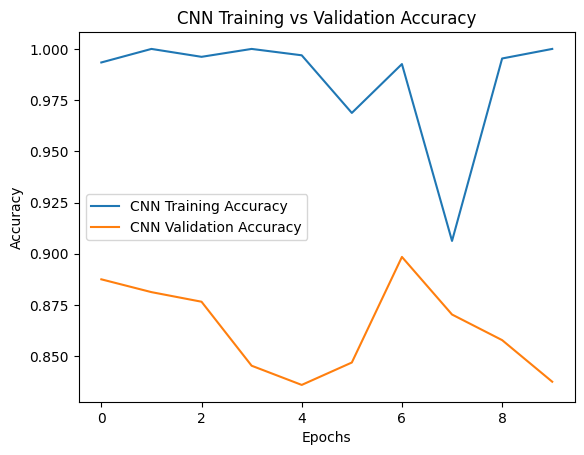

In [22]:
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training vs Validation Accuracy')
plt.show()


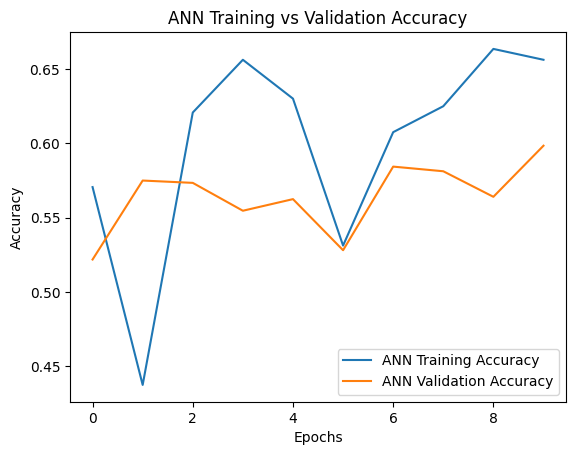

In [23]:
plt.plot(ann_history.history['accuracy'], label='ANN Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='ANN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ANN Training vs Validation Accuracy')
plt.show()


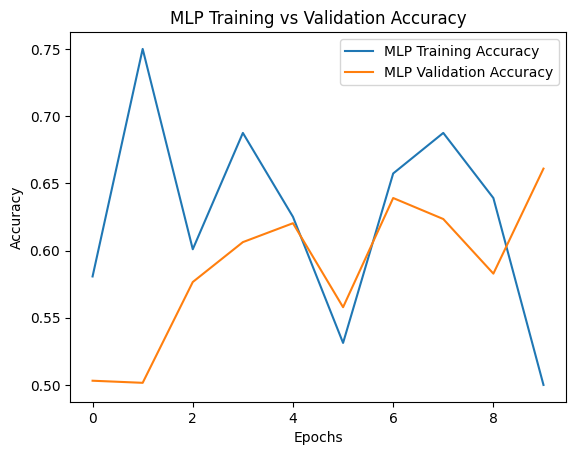

In [24]:
plt.plot(mlp_history.history['accuracy'], label='MLP Training Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='MLP Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP Training vs Validation Accuracy')
plt.show()
